In [24]:
#importing necessary libraries
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import MultiLabelBinarizer,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [25]:
#Load the movie metadata CSV file
df = pd.read_csv("movies_metadata.csv",low_memory=False)
df.head

<bound method NDFrame.head of        adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   


In [3]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [4]:
#Checking all the columns from datasets
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
#We only need title,genre,vote average and popularity for this project
movies = df[['title','genres','vote_average','popularity']].copy()

In [6]:
#Drop rows with missing values in important columns
movies = movies.dropna(subset=['genres','vote_average','popularity'])

In [8]:
#Extact genre names from JSON like string
def parse_genres(genre_str):

  try:
      genres = ast.literal_eval(genre_str)
      return [g['name'] for g in genres]
  except (ValueError,SyntaxError):
    return []

movies['genre_list'] = movies['genres'].apply(parse_genres)

print(movies['genre_list'])

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genre_list, Length: 45460, dtype: object


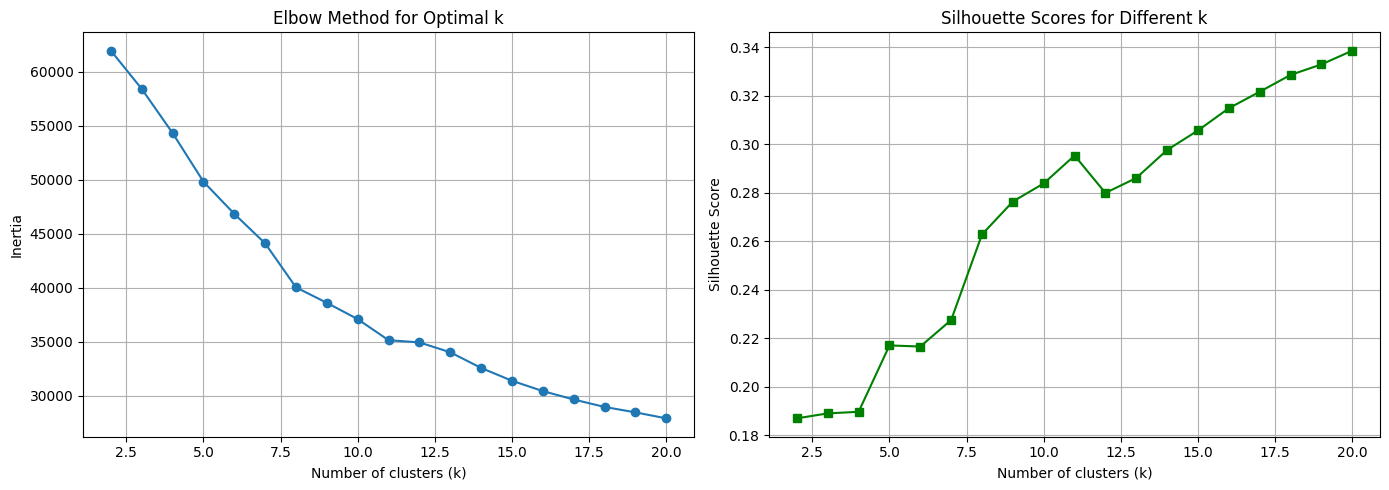

In [26]:
inertia_values = []
silhouette_scores = []
k_values = range(2, 21)

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(final_features)
    inertia_values.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(final_features, kmeans_model.labels_))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(k_values, inertia_values, marker='o')
axs[0].set_title('Elbow Method for Optimal k')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Inertia')
axs[0].grid(True)

axs[1].plot(k_values, silhouette_scores, marker='s', color='green')
axs[1].set_title('Silhouette Scores for Different k')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)

plt.tight_layout()
plt.show()

<ipython-input-9-70eaf5111c3f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis',legend=False)


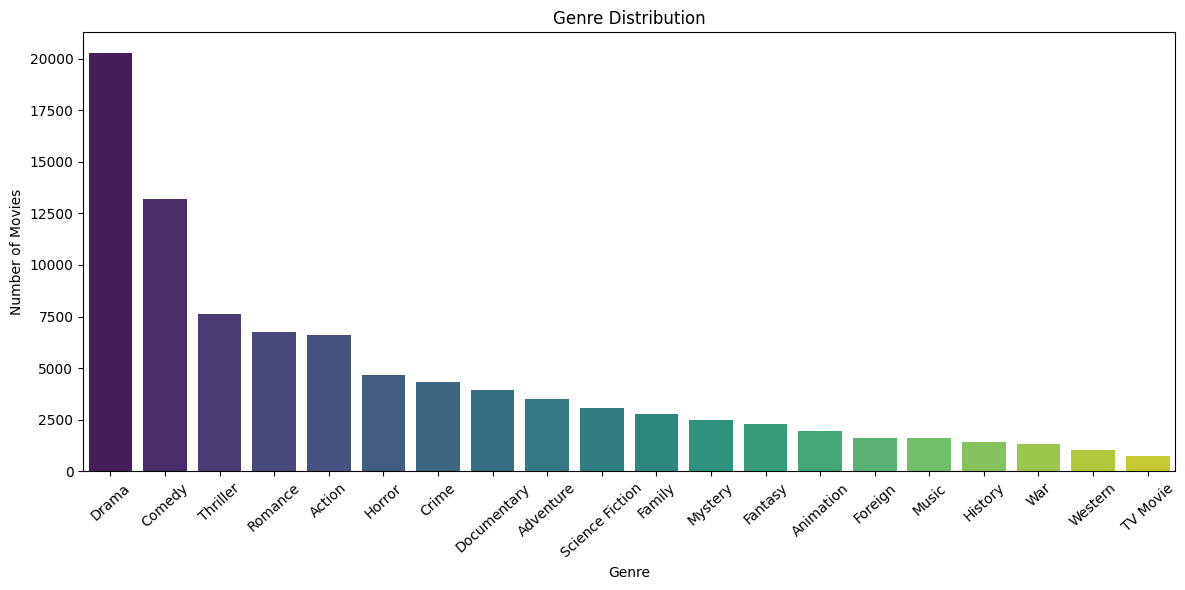

In [9]:
genre_counts = movies['genre_list'].explode().value_counts().sort_values(ascending=False)
# print(genra_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis',legend=False)
plt.title('Genre Distribution')
plt.xticks(rotation=42)
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

In [10]:
#This turns genre lists into binary features
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movies['genre_list'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
# print (genre_df)

In [12]:
#We scale vote_average and popularity to range [0,1]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(movies[['vote_average','popularity']])
scaled_df = pd.DataFrame(scaler_features,columns=['vote_average','popularity'])
print(scaled_df)
#print (type(movie[['vote average']]))

       vote_average  popularity
0              0.77    0.040087
1              0.69    0.031079
2              0.65    0.021394
3              0.61    0.007049
4              0.57    0.015320
...             ...         ...
45455          0.40    0.000132
45456          0.90    0.000326
45457          0.38    0.001649
45458          0.00    0.000006
45459          0.00    0.000298

[45460 rows x 2 columns]


In [13]:
#Combine all features into one matrix
final_features = pd.concat([genre_df,scaled_df],axis=1)

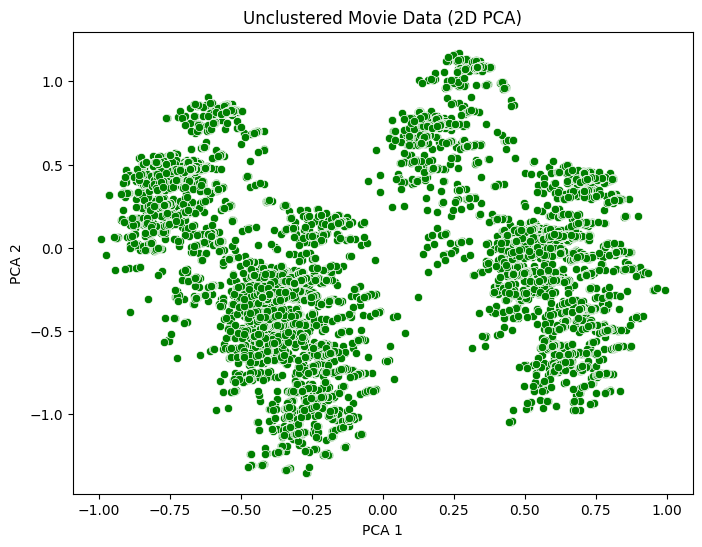

In [16]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_features)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_features[:,0],y=reduced_features[:,1],color='green')
plt.title('Unclustered Movie Data (2D PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

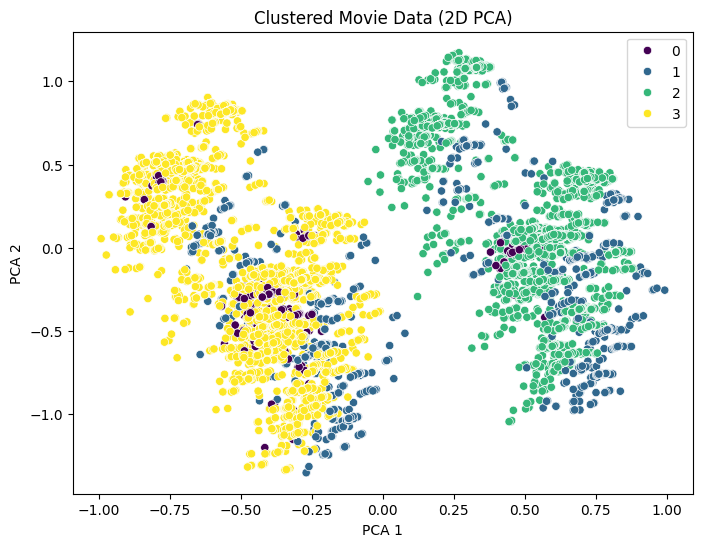

In [17]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_features)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster = kmeans.fit_predict(final_features)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_features[:,0],y=reduced_features[:,1],hue=cluster,palette='viridis')
plt.title('Clustered Movie Data (2D PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

<ipython-input-18-f8e0a50638e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=movies['cluster'],palette='coolwarm')


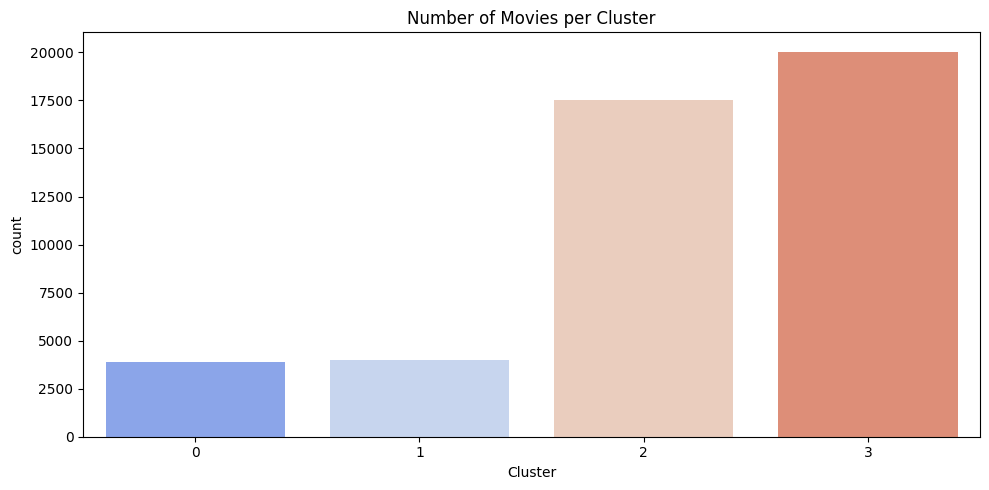

In [18]:
# Fit  KMeans using chosen k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
movies['cluster'] = kmeans.fit_predict(final_features)

#Plot how many movies per cluster
plt.figure(figsize=(10,5))
sns.countplot(x=movies['cluster'],palette='coolwarm')
plt.title('Number of Movies per Cluster')
plt.xlabel('Cluster')
plt.ylabel('count')
plt.tight_layout()
plt.show()


In [21]:
# Define recommendation function
def recommend_movies(movie_title,n = 5):
  """
    Parameters:
         movie_title(str): Title of the movie to base recommendation on.
         n (int): Number of similar movies to return.

    Returns:
      pd.DataFrames : Top N recommendation movies in the same cluster.
  """
  # Lowercase comparison for robust matching
  target = movies[movies['title'].str.lower() == movie_title.lower()]

  if target.empty:
    return f" Movie titled '{movie_title}' not found in dataset."

  # Get the cluster of the target movie
  cluster_id = target['cluster'].values[0]

  # Get all movies from the same cluster
  similar_movies = movies[(movies['cluster'] == cluster_id) &
                          (movies['title'].str.lower() != movie_title.lower())]

  # Return top N based on vote_average and popularity
  return similar_movies[['title','vote_average','popularity']].sort_values(by=['vote_average','popularity'],ascending=False).head(n)


# Exmaple usage:
print("Recommendation movies similar to 'Sabrina':")
print(recommend_movies("Sabrina",n=10))


Recommendation movies similar to 'Sabrina':
                                               title  vote_average popularity
45371          LEGO DC Super Hero Girls: Brain Drain          10.0   8.413734
36400                                Mad at the Moon          10.0   1.225055
30288                                  Backyard Dogs          10.0     0.9854
43473                                        Firefly          10.0   0.957019
27295                                 The Little Hut          10.0   0.883862
2653                                Stiff Upper Lips          10.0   0.882132
21408                                  Growing Pains          10.0   0.853913
42612                 Stephen Lynch: Hello Kalamazoo          10.0   0.724499
30833              Mortal Kombat: The Journey Begins          10.0   0.714715
42731  Christopher Titus: Angry Pursuit of Happiness          10.0   0.671568
